# 워드클라우드 만드는 과정

### 4-10 크롤링 결과 중 해시태그 데이터 불러오기

In [1]:
import pandas as pd 
raw_total = pd.read_excel('./3_1_crawling_raw.xlsx')
raw_total['tags'][:3]

0    ['#성산일출봉맛집', '#성산맛집', '#우도맛집', '#제주맛집', '#제주도맛...
1    ['#제주도맛집', '#서귀포맛집', '#제주도맛집베스트', '#제주데이트', '#...
2    ['#제주맛집', '#제주도맛집', '#제주카페', '#제주도카페', '#성산일출봉...
Name: tags, dtype: object

### 4-11 해시태그 통합 저장하기

In [8]:
tags_total = []
for tags in raw_total['tags']:
    tags_list = tags[2:-2].split("','")
    for tag in tags_list:
        tags_total.append(tag)

In [9]:
tags_total

["#성산일출봉맛집', '#성산맛집', '#우도맛집', '#제주맛집', '#제주도맛집', '#세화맛집', '#성산카페', '#서귀포맛집', '#서귀포카페', '#제주성산맛집",
 "#제주도맛집', '#서귀포맛집', '#제주도맛집베스트', '#제주데이트', '#제주도맛집추천', '#제주도맛집투어', '#갈치조림맛집', '#좋반', '#좋아요반사', '#좋아요', '#좋반테러",
 "#제주맛집', '#제주도맛집', '#제주카페', '#제주도카페', '#성산일출봉맛집', '#성산맛집', '#섭지코지맛집', '#월정리맛집', '#세화맛집', '#제주성산맛집', '#성산카페', '#성산핫플', '#곽지맛집', '#제주동쪽맛집', '#제주가볼만한곳",
 '',
 "#성산맛집', '#제주섭지코지맛집', '#제주맛집추천', '#제주도점심', '#제주성산맛집', '#성산일출봉맛집', '#제주도서귀포맛집', '#광치기해변맛집', '#성산읍맛집', '#제주돔베고기', '#성산일출봉고기국수맛집",
 "#당당', '#당당', '#브런치수플레', '#꿈에나올까무섭..', '#수플레맛집', '#파슷하또한맛집', '#그냥브런치맛집', '#다맛있는', '#당당",
 '#월정리갈비밥.월정리점',
 '',
 '#월정리갈비밥.월정리점',
 "#제주곱도리탕', '#곱도리탕', '#서귀포신시가지맛집', '#서귀포맛집', '#제주도맛집', '#곱스럽닭방문', '#서귀포라마다호텔', '#서귀포벨류호텔",
 "#죽성고을', '#제주한식', '#제주도한식', '#제주밥집', '#제주시밥집', '#제주밥집추천', '#제주돌솥밥', '#제주맛집', '#제주도맛집', '#제주시맛집', '#오등동맛집', '#제주도민맛집', '#제주그램', '#제주도그램', '#제주여행', '#제주도여행', '#제주앓이', '#제주살이', '#제주일상', '#제주라이프', '#jejudo', '#jeju', '#jeju

# 해시태그 출현 빈도 집계

### 4-12 빈도수 집계하기(Counter)

In [11]:
from collections import Counter
tag_counts = Counter(tags_total)

### 4-13 가장 많이 사용된 해시태그 살펴보기

In [12]:
tag_counts.most_common(50)

[('', 27),
 ('#월정리갈비밥.월정리점', 2),
 ("#제주곱도리탕', '#곱도리탕', '#서귀포신시가지맛집', '#서귀포맛집', '#제주도맛집', '#곱스럽닭방문', '#서귀포라마다호텔', '#서귀포벨류호텔",
  2),
 ("#제주호빠', '#제주호스트바', '#제주', '#신제주호빠', '#제주정빠', '#제주놀만한곳', '#제주여성전용', '#제주호텔', '#제주관광', '#제주맛집', '#연동호빠', '#연동호스트클럽",
  2),
 ("#성산일출봉맛집', '#성산맛집', '#우도맛집', '#제주맛집', '#제주도맛집', '#세화맛집', '#성산카페', '#서귀포맛집', '#서귀포카페', '#제주성산맛집",
  1),
 ("#제주도맛집', '#서귀포맛집', '#제주도맛집베스트', '#제주데이트', '#제주도맛집추천', '#제주도맛집투어', '#갈치조림맛집', '#좋반', '#좋아요반사', '#좋아요', '#좋반테러",
  1),
 ("#제주맛집', '#제주도맛집', '#제주카페', '#제주도카페', '#성산일출봉맛집', '#성산맛집', '#섭지코지맛집', '#월정리맛집', '#세화맛집', '#제주성산맛집', '#성산카페', '#성산핫플', '#곽지맛집', '#제주동쪽맛집', '#제주가볼만한곳",
  1),
 ("#성산맛집', '#제주섭지코지맛집', '#제주맛집추천', '#제주도점심', '#제주성산맛집', '#성산일출봉맛집', '#제주도서귀포맛집', '#광치기해변맛집', '#성산읍맛집', '#제주돔베고기', '#성산일출봉고기국수맛집",
  1),
 ("#당당', '#당당', '#브런치수플레', '#꿈에나올까무섭..', '#수플레맛집', '#파슷하또한맛집', '#그냥브런치맛집', '#다맛있는', '#당당",
  1),
 ("#죽성고을', '#제주한식', '#제주도한식', '#제주밥집', '#제주시밥집', '#제주밥집추천', '#제주돌

### 4-14 데이터 정제하기

In [15]:
STOPWORDS = ['#일상','#선팔','#제주도','#jeju','#제주호스트바','#신제주호빠','#제주정빠','#연동호빠', '#연동호스트클럽', '#소통','#맞팔' ]

tag_total_selected = []
for tag in tags_total:
    if tag not in STOPWORDS:
        tag_total_selected.append(tag)
        
tag_counts_selected = Counter(tag_total_selected)
tag_counts_selected.most_common(10)

[('', 27),
 ('#월정리갈비밥.월정리점', 2),
 ("#제주곱도리탕', '#곱도리탕', '#서귀포신시가지맛집', '#서귀포맛집', '#제주도맛집', '#곱스럽닭방문', '#서귀포라마다호텔', '#서귀포벨류호텔",
  2),
 ("#제주호빠', '#제주호스트바', '#제주', '#신제주호빠', '#제주정빠', '#제주놀만한곳', '#제주여성전용', '#제주호텔', '#제주관광', '#제주맛집', '#연동호빠', '#연동호스트클럽",
  2),
 ("#성산일출봉맛집', '#성산맛집', '#우도맛집', '#제주맛집', '#제주도맛집', '#세화맛집', '#성산카페', '#서귀포맛집', '#서귀포카페', '#제주성산맛집",
  1),
 ("#제주도맛집', '#서귀포맛집', '#제주도맛집베스트', '#제주데이트', '#제주도맛집추천', '#제주도맛집투어', '#갈치조림맛집', '#좋반', '#좋아요반사', '#좋아요', '#좋반테러",
  1),
 ("#제주맛집', '#제주도맛집', '#제주카페', '#제주도카페', '#성산일출봉맛집', '#성산맛집', '#섭지코지맛집', '#월정리맛집', '#세화맛집', '#제주성산맛집', '#성산카페', '#성산핫플', '#곽지맛집', '#제주동쪽맛집', '#제주가볼만한곳",
  1),
 ("#성산맛집', '#제주섭지코지맛집', '#제주맛집추천', '#제주도점심', '#제주성산맛집', '#성산일출봉맛집', '#제주도서귀포맛집', '#광치기해변맛집', '#성산읍맛집', '#제주돔베고기', '#성산일출봉고기국수맛집",
  1),
 ("#당당', '#당당', '#브런치수플레', '#꿈에나올까무섭..', '#수플레맛집', '#파슷하또한맛집', '#그냥브런치맛집', '#다맛있는', '#당당",
  1),
 ("#죽성고을', '#제주한식', '#제주도한식', '#제주밥집', '#제주시밥집', '#제주밥집추천', '#제주돌

# 막대차트로 해시태그 살펴보기

### 4-15 시각화 라이브러리 호출 및 환경설정(한글폰트)

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
import sys

if sys.platform in ["win32", "win64"]:
    font_name = "malgun gothic"
elif sys.platform == "darwin":
    font_name = "AppleGothic"

rc('font',family=font_name)

### 4-16 데이터 준비하기

In [17]:
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ['tags','counts']

# 4-17 막대 차트 그리기

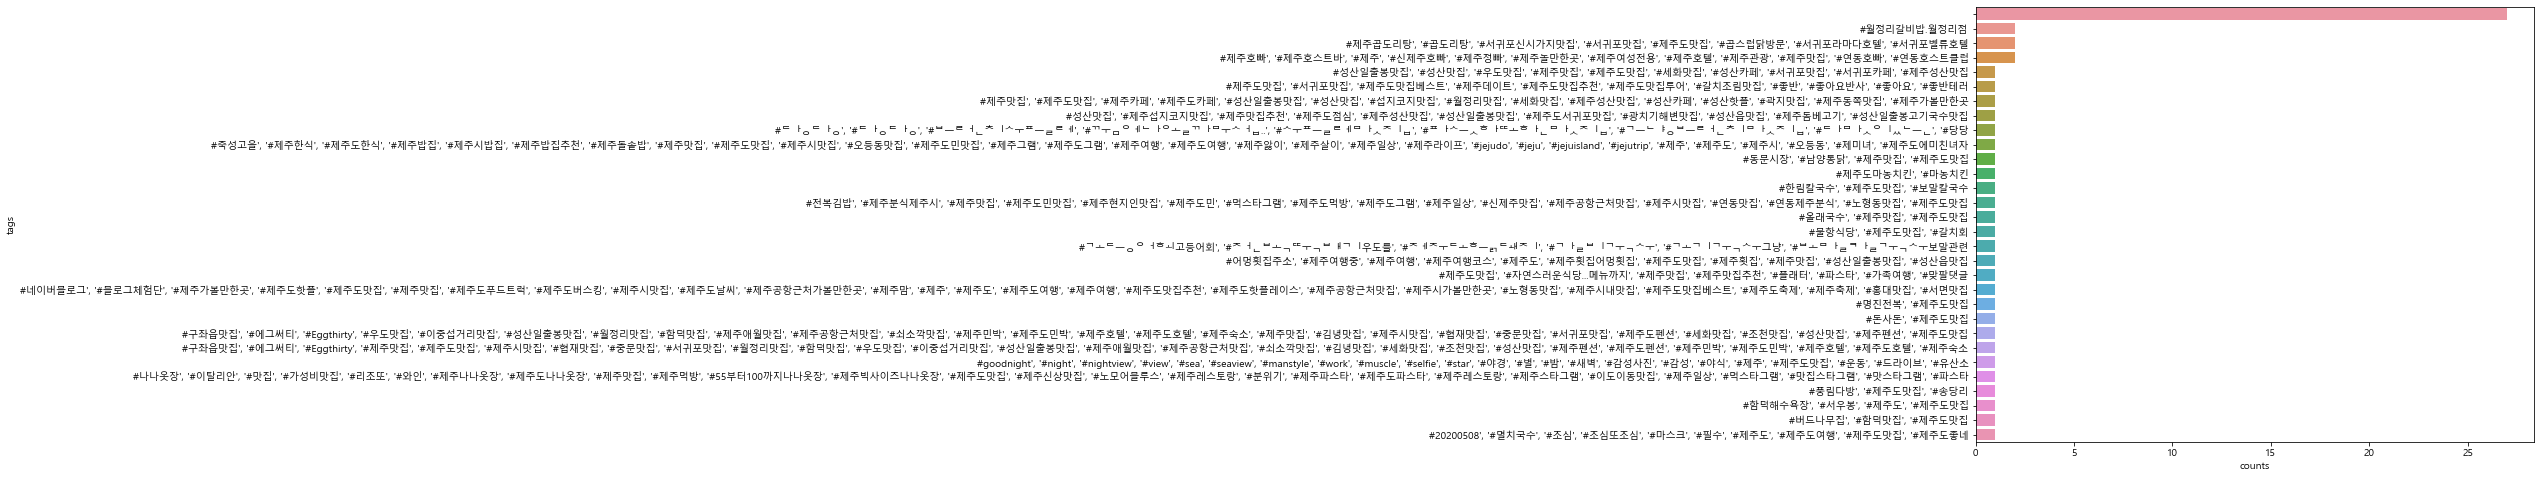

In [18]:
plt.figure(figsize=(10,8))
sns.barplot(x='counts', y='tags', data=tag_counts_df)

# 워드 클라우드 그리기

### 4-18 워드클라우드 라이브러리 불러오기

In [21]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import platform

if platform.system() == 'Windows':   #윈도우의 경우
    font_path = "c:/Windows/Fonts/malgun.ttf"
elif platform.system() == "Darwin":   #Mac 의 경우
    font_path = "/Users/$USER/Library/Fonts/AppleGothic.ttf"

### 4-19 워드클라우드 만들기

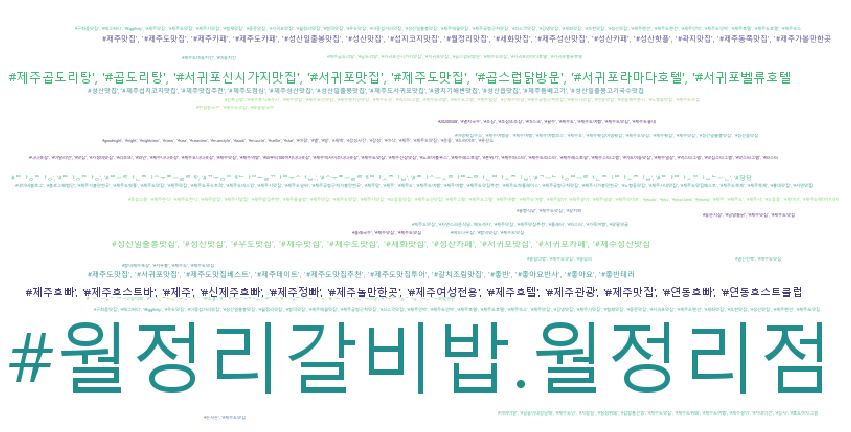

In [24]:
wordclound = WordCloud(font_path = font_path,
                      background_color='white',
                      max_words =100,
                      relative_scaling = 0.3,
                      width = 800,
                      height = 400).generate_from_frequencies(tag_counts_selected)

plt.figure(figsize=(15,10))
plt.imshow(wordclound)
plt.axis('off')
plt.savefig('./3_2_tag_wordcloud.png')